<a href="https://colab.research.google.com/github/realyou0312/DataAnalysis/blob/main/YZ%EC%84%B8%EB%8C%80_%EC%A3%BC%EC%8B%9D_%EC%A2%85%EB%AA%A9_%EC%84%B9%ED%84%B0%EC%99%80_%EB%A7%A4%EB%A7%A4%EC%A0%95%EB%B3%B4%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#기본
import pandas as pd
import numpy as np
import datetime

#크롤링
from selenium import webdriver as wd
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import time

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud 
from PIL import Image 

import plotly.io as pio
pio.renderers.default = 'notebook_connected'


#클러스터링
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
pd.set_option('display.max_columns', None)

# 0. 외부데이터 크롤링

주식 종목을 업종별로 묶어서 YZ 세대가 어떤 업종에 관심이 있는지 확인하기 위해 외부데이터를 크롤링했습니다.

- 국내 주식 업종 출처: Seibro 증권정보 포털
- 해외 주식 업종 출처: FinViz

종목 코드를 이용하여 업종과 시가총액 등의 정보를 수집하여 대회 데이터와 연결시켰습니다.

## 0.1 국내 주식 업종 크롤링

In [ ]:
driver = wd.Chrome("/Y&Z세대 투자자 프로파일링/리그2/chromedriver")

url = 'https://seibro.or.kr/websquare/control.jsp?w2xPath=/IPORTAL/user/stock/BIP_CNTS02004V.xml&menuNo=41'
driver.get(url)
driver.implicitly_wait(5)

driver.find_element_by_xpath('//*[@id="CHECKBOX_MART_TYPE_input_0"]').click()
driver.find_element_by_xpath('//*[@id="CHECKBOX_SECN_TYPE_input_0"]').click()
driver.find_element_by_xpath('//*[@id="CHECKBOK_VISIBLE_COLUMN_input_5"]').click()
driver.find_element_by_xpath('//*[@id="CHECKBOK_VISIBLE_COLUMN_input_1"]').click()
driver.find_element_by_xpath('//*[@id="CHECKBOK_VISIBLE_COLUMN_input_6"]').click()
driver.find_element_by_xpath('//*[@id="CHECKBOK_VISIBLE_COLUMN_input_11"]').click()

time.sleep(1)

driver.find_element_by_xpath('//*[@id="select_array_input_0"]/option[2]').click()
driver.implicitly_wait(5)
driver.find_element_by_xpath('//*[@id="image4"]').click()
driver.implicitly_wait(5)
time.sleep(3)

iem_cd = []
iem_nm = []
issue_type = []
market = []
stock_type = []
trs_qty = []
market_cap = []
per = []
cat1 = []
cat2 = []
cat3 = []

for i in range(1, 714):
    time.sleep(3)
    for i in range(0,15):
        
        #종목코드
        iem_cd_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="grid1_cell_'+str(i)+'_1"]/nobr')]
        iem_cd += iem_cd_temp
        
        #종목명
        iem_nm_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="grid1_cell_'+str(i)+'_2"]/nobr')]
        iem_nm += iem_nm_temp
        
        #발행형태
        issue_type_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="grid1_cell_'+str(i)+'_3"]/nobr')]
        issue_type += issue_type_temp
        
        #시장구분
        market_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="grid1_cell_'+str(i)+'_4"]/nobr')]
        market += market_temp
        
        #주식종류
        stock_type_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="grid1_cell_'+str(i)+'_6"]/nobr')]
        stock_type += stock_type_temp
        
        #거래량
        trs_qty_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="grid1_cell_'+str(i)+'_9"]/nobr')]
        trs_qty += trs_qty_temp       
        
        #시가총액
        market_cap_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="grid1_cell_'+str(i)+'_10"]/nobr')]
        market_cap += market_cap_temp
        
        #PER
        per_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="grid1_cell_'+str(i)+'_11"]/nobr')]
        per += per_temp
        
        #업종(대분류)
        cat1_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="grid1_cell_'+str(i)+'_16"]/nobr')]
        cat1 += cat1_temp
        
        #업종(중분류)
        cat2_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="grid1_cell_'+str(i)+'_17"]/nobr')]
        cat2 += cat2_temp
        
        #업종(소분류)
        cat3_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="grid1_cell_'+str(i)+'_18"]/nobr')]
        cat3 += cat3_temp        
        
        print(iem_cd_temp, iem_nm_temp, issue_type_temp, market_temp, stock_type_temp, trs_qty_temp, market_cap_temp, per_temp, cat1_temp, cat2_temp, cat3_temp)

    driver.find_element_by_xpath('//*[@id="cntsPaging01_next_btn"]/a/img').click()
    time.sleep(7)    

kr = pd.DataFrame({"종목코드": iem_cd, "종목명": iem_nm, "발행형태": issue_type, "시장구분": market,
                  "주식종류": stock_type, "거래량": trs_qty, "시가총액": market_cap, "PER": per,
                  "업종대분류": cat1, "업종중분류": cat2, "업종소분류": cat3})
kr.to_csv('국내주식업종.csv', index=False)

## 0.2. 해외 주식 업종 크롤링

In [ ]:
driver = wd.Chrome("/Users/seunghee/OneDrive/문서/DSL/Y&Z세대 투자자 프로파일링/리그2/chromedriver")

url = 'https://finviz.com/screener.ashx?v=111&o=ticker'
driver.get(url)
driver.implicitly_wait(5)

ticker=[]
company=[]
sector=[]
industry=[]
country=[]
market_cap=[]
pe=[]
volume=[]

for n in range(1, 377):
    time.sleep(3)
    driver.find_element_by_xpath('//*[@id="pageSelect"]/option['+str(n)+']').click()
    driver.implicitly_wait(5)
    for i in range(2,22):
        
        #Ticker
        ticker_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="screener-content"]/table/tbody/tr[4]/td/table/tbody/tr['+str(i)+']/td[2]/a')]
        ticker += ticker_temp
        
        #Company
        company_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="screener-content"]/table/tbody/tr[4]/td/table/tbody/tr['+str(i)+']/td[3]/a')]
        company += company_temp
        
        #Sector
        sector_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="screener-content"]/table/tbody/tr[4]/td/table/tbody/tr['+str(i)+']/td[4]/a')]
        sector += sector_temp
        
        #Industry
        industry_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="screener-content"]/table/tbody/tr[4]/td/table/tbody/tr['+str(i)+']/td[5]/a')]
        industry += industry_temp
        
        #Country
        country_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="screener-content"]/table/tbody/tr[4]/td/table/tbody/tr['+str(i)+']/td[6]/a')]
        country += country_temp
        
        #Market Cap
        market_cap_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="screener-content"]/table/tbody/tr[4]/td/table/tbody/tr['+str(i)+']/td[7]/a')]
        market_cap += market_cap_temp
        
        #PE
        pe_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="screener-content"]/table/tbody/tr[4]/td/table/tbody/tr['+str(i)+']/td[8]/a')]
        pe += pe_temp
        
        #Volume
        volume_temp = [i.text for i in driver.find_elements_by_xpath('//*[@id="screener-content"]/table/tbody/tr[4]/td/table/tbody/tr['+str(i)+']/td[11]/a')]
        volume += volume_temp
        
        print(ticker_temp, company_temp, sector_temp, industry_temp, country_temp, market_cap_temp, pe_temp, volume_temp)
        
    driver.find_element_by_xpath('//*[@id="screener-content"]/table/tbody/tr[3]/td/table/tbody/tr/td[5]/a').click()
    time.sleep(3)

oss = pd.DataFrame({"ticker": ticker, "company": company, "sector": sector, "industry": industry, "country": country,
                  "market_cap": market_cap, "pe": pe, "volume": volume})
oss.to_csv('해외주식업종.csv', index=False)

# 1. 데이터 전처리

## 1.1 전체 데이터 합치기

각 csv 파일을 하나의 dataframe으로 볼 수 있게 합쳤습니다.

외부데이터 크롤링한 파일도 합쳤습니다. (iem_more_info.csv)

In [ ]:
cus_info = pd.read_csv('2_cus_info.csv')
act_info = pd.read_csv('2_act_info.csv')
iem_info = pd.read_csv('2_iem_info.csv')
trd_kr = pd.read_csv('2_trd_kr.csv')
trd_oss = pd.read_csv('2_trd_oss.csv')
iem_more = pd.read_csv('iem_more_info.csv')

In [ ]:
trd = pd.concat([trd_kr, trd_oss])
trd.iem_cd = trd.iem_cd.str.rstrip()
df = pd.merge(trd, iem_more, on='iem_cd', how='left')
df = pd.merge(df, act_info, on = 'act_id', how = 'left')
df = pd.merge(df, cus_info, on='cus_id', how='left')

## 1.2 Outlier 제거

거래 횟수를 확인하였더니 21만회 주식 거래를 한 고객이 있어 아웃라이어로 판단하여 제거했습니다.

In [ ]:
#거래 횟수
act_cnt = df.groupby(["cus_id"]).count().act_id.reset_index()
act_cnt = act_cnt.sort_values('act_id', ascending = False)
act_cnt.head(10)

,cus_id,act_id
4282,6df8023b7d1cba9b6f199bbb9a7a48b5a087aff4143523...,218601
9514,f2a36b906ebc7cfc5cff61cc53983d137eeccaaa271763...,59486
6746,adc6f9325eba9d6dcf9157f57587dbee76f67ec0bea02c...,31509
5986,99b1dd8216a94da7bf0b8288b425e17e02c54d2136b364...,26120
1444,24b8e1a726457bbc0f849f3e4c6d2471626776e6ba09cf...,24790
5392,8cb336c84a02fdcaa1f5419190629b1532bfe5bea3ee11...,24319
616,0fe0b2cdaf88cb007b44644ba8038894182df905e9cf38...,22403
9753,f8f5f2a45565e6db2b4c6def8298c9bb865bbee85216d3...,19536
4740,7a20763549f083580d052d0a962e645240e5dfc5b1f59a...,19194
7304,bb158a9ccc552bdc7802940dfedebf1966016ab8511d51...,18860


In [ ]:
df = df[df.cus_id != '6df8023b7d1cba9b6f199bbb9a7a48b5a087aff4143523ab07c8ece23f1ec79c']

## 1.3 총체결금액 행 생성

데이터 구성이 각 거래 당 체결수량과 1주 체결 가격으로만 이루어져, 각 거래 별로 총 체결금액을 확인하고자 체결수량과 체결금액을 곱하여 총체결금액 행을 생성했습니다.

In [ ]:
df['total_amt'] = df['cns_qty'] * df['orr_pr']

## 1.4 나이대별 분포 확인 

고객의 연령 분포가 어떻게 되는지 확인하기 위해 그래프를 그려봤습니다.

In [ ]:
ages = ['19세 이하','20~24세','25~29세','30~34세','35~39세','40~44세','45~49세','50~54세','55~59세'
,'60~54세','65~70세','70세 이상']

cus_age = df.groupby(['cus_age']).agg({'cus_id':'nunique'}).reset_index()
cus_age['ages'] = ages

labels = {'ages':'나이대', 'cus_id':'고객수'}

#YZ 색깔로 표시하기
colors = ['lightslategray',] * 12
colors[1] = 'skyblue'
colors[2] = 'skyblue'
colors[3] = 'skyblue'
colors[4] = 'skyblue'

fig = go.Figure(data = go.Bar(
    x = cus_age['ages'], y = cus_age['cus_id'], 
    marker_color = colors))
fig.update_layout(title = "나이대 별 고객 수")
fig.show()

#### 나이대별 분포 분석
- 20~39세보다 40세 이상 고객이 더 많음
- 45~49세에 해당하는 고객이 가장 많음

# 2. YZ 세대와 X 세대 나누기

YZ세대와 X세대 각각의 특징을 분석하고자 나이를 기준으로 두 그룹으로 분류했습니다.
- YZ 세대 정의: 20~39세 고객
- X 세대 정의: 40세 이상 고객

In [ ]:
yz = df[(df['cus_age']<=35)&(df['cus_age']>=20)]
x = df[df['cus_age']>=40]

## 2.1 YZ 세대 & X 세대 비교

### 2.1.1 국내 해외 비율

YZ세대와 X세대 중에서 어느 그룹이 국내 혹은 해외 주식을 더 많이 거래하는지 확인하기 위해 pivot table로 국내 주식 거래량과 해외 주식 거래량을 count한 후 국내/전체를 하여 국내주식 거래비율은 kr_rate를 구했습니다.

In [ ]:
yz_kr = pd.pivot_table(yz, index=['cus_id'], values=['cns_qty'], columns = ['kr_oss_cd'], aggfunc='count', margins=True, fill_value=0)
yz_kr[('cns_qty','kr_rate')] = yz_kr[('cns_qty', 'kr')] / yz_kr[('cns_qty', 'All')]
x_kr = pd.pivot_table(x, index=['cus_id'], values=['cns_qty'], columns = ['kr_oss_cd'], aggfunc='count', margins=True, fill_value=0)
x_kr[('cns_qty','kr_rate')] = x_kr[('cns_qty', 'kr')] / x_kr[('cns_qty', 'All')]
yz_kr_rate = pd.DataFrame({'kr_rate':yz_kr[('cns_qty','kr_rate')]})
x_kr_rate = pd.DataFrame({'kr_rate':x_kr[('cns_qty','kr_rate')]})

In [ ]:
print("yz세대 중 국내만 하는 고객수: ", yz_kr_rate[yz_kr_rate['kr_rate']==1].count())
print("x세대 중 국내만 하는 고객수: ", x_kr_rate[x_kr_rate['kr_rate']==1].count())

yz세대 중 국내만 하는 고객수:  kr_rate    2965
dtype: int64
x세대 중 국내만 하는 고객수:  kr_rate    6064
dtype: int64


#### YZ세대
- YZ세대 전체 고객 3419명 중 100% 국내주식만 하는 고객은 2965명으로 86.7프로에 해당함

#### X세대
- X세대 전체 고객 6370명 중 100% 국내주식만 하는 고객은 6064명으로 95.2프로에 해당함

In [ ]:
yz_kr_rate = yz_kr_rate[yz_kr_rate['kr_rate']!= 1.000000]
x_kr_rate = x_kr_rate[x_kr_rate['kr_rate']!= 1.000000]

fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 국내비율 분포', 'X세대 국내비율 분포'))
fig.add_trace(go.Histogram(x= yz_kr_rate['kr_rate'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= x_kr_rate['kr_rate'], name='x세대'), row = 1, col=2)
fig.update_layout(height = 600, width = 950)
fig.show()

순수 국내주식 거래 고객을 제외한 나머지 고객들에 한해 국내주식 거래 비율 분포를 확인했습니다. 

#### 결과
- 나머지 고객들에 한해서는 눈에 보이는 큰 차이는 없었습니다.
- 하지만 비율을 계산해보면 YZ세대의 총 거래중 국내 거래 비율은 0.98292이며, X세대의 총 거래중 국내 거래 비율은 0.99358로 나타났습니다.
- 따라서, YZ세대가 X세대보다 해외주식을 더 많이 거래한다는 것을 알 수 있습니다.

### 2.2.2 매도 매수 비율

YZ세대와 X세대 중 어느 세대가 더 매도 혹은 매수율이 높은지 확인하기 위해 고객id별로 매도와 매수 거래 횟수를 count하고 매수/전체 비율을 계산하여 매수 비율인 buying_rate을 계산했습니다.

In [ ]:
yz_buying = pd.pivot_table(yz, index=['cus_id'], values=['cns_qty'], columns = ['sby_dit_cd'], aggfunc='count', margins=True, fill_value=0)
yz_buying[('cns_qty','buying_rate')] = yz_buying[('cns_qty',     2)] / yz_buying[('cns_qty', 'All')]
x_buying = pd.pivot_table(x, index=['cus_id'], values=['cns_qty'], columns = ['sby_dit_cd'], aggfunc='count', margins=True, fill_value=0)
x_buying[('cns_qty','buying_rate')] = x_buying[('cns_qty',     2)] / x_buying[('cns_qty', 'All')]
yz_buying_rate = pd.DataFrame({'buying_rate':yz_buying[('cns_qty','buying_rate')]})
x_buying_rate = pd.DataFrame({'buying_rate':x_buying[('cns_qty','buying_rate')]})

In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 매수비율 분포', 'X세대 매수비율 분포'))
fig.add_trace(go.Histogram(x= yz_buying_rate['buying_rate'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= x_buying_rate['buying_rate'], name='x세대'), row = 1, col=2)
fig.update_layout(height = 600, width = 950)
fig.show()

#### 결과
- 매수비율 분포 그래프를 보면 눈에 띄는 차이는 크게 없었습니다.
- 하지만 자세히 계산을 해보면 YZ세대의 총 매수 비율은 0.63757, X세대의 총 매수 비율은 0.62802로 약 0.01정도 차이났습니다.
- 따라서, YZ세대의 매수 비율이 X세대의 매수 비율보다 높게 나타났습니다.

### 2.2.3. 종목수

YZ세대와 X세대 중에서 어느 세대가 더 다양한 종목을 거래하는지 고객별로 고유한 종목수를 count하여 계산했습니다.

In [ ]:
yz_items = yz.groupby(['cus_id']).agg({'iem_cd':'nunique'})
yz_iem_cnt = pd.DataFrame({'iem_cnt':yz_items['iem_cd']})
x_items = x.groupby(['cus_id']).agg({'iem_cd':'nunique'})
x_iem_cnt = pd.DataFrame({'iem_cnt':x_items['iem_cd']})

In [ ]:
print("YZ세대 종목수 500이상: ", yz_iem_cnt[yz_iem_cnt['iem_cnt']>500].count())
print("X세대 종목수 500이상: ", x_iem_cnt[x_iem_cnt['iem_cnt']>500].count())

YZ세대 종목수 500이상:  iem_cnt    10
dtype: int64
X세대 종목수 500이상:  iem_cnt    28
dtype: int64


In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 종목수 분포', 'X세대 종목수 분포'))
fig.add_trace(go.Histogram(x= yz_iem_cnt['iem_cnt'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= x_iem_cnt['iem_cnt'], name='x세대'), row = 1, col=2)
fig.update_yaxes(type="log", range=[0,4])
fig.update_xaxes(range=[0, 1300])
fig.update_layout(height = 600, width = 950)
fig.show()

#### 결과
- 종목수 분포 그래프를 보면 YZ세대보다 X세대가 더 많은 종목을 거래하는 것을 알 수 있습니다. 
- 실제로 고객을 종목수로 정렬해 보면 YZ세대에서는 500개가 넘는 종목을 거래하는 고객은 10명이었지만 X세대에서 종목 500개 이상 거래하는 고객은 28명이었습니다. 
- 따라서, X세대가 YZ세대보다 거래 종목수가 더 높다고 볼 수 있습니다.

### 2.2.4. 총거래횟수

YZ세대와 X세대 중에서 어느 세대가 주식 거래를 많이 하는지 확인하기 위해 고객별로 거래횟수를 count해서 총거래횟수인 trans_cnt를 계산했습니다.

In [ ]:
yz_act_cnt = yz.groupby(["cus_id"]).count().act_id.reset_index()
yz_trans_cnt = yz_act_cnt.set_index("cus_id", inplace = True)
yz_trans_cnt = pd.DataFrame({'trans_cnt':yz_act_cnt['act_id']})
x_act_cnt = x.groupby(["cus_id"]).count().act_id.reset_index()
x_trans_cnt = x_act_cnt.set_index("cus_id", inplace = True)
x_trans_cnt = pd.DataFrame({'trans_cnt':x_act_cnt['act_id']})

In [ ]:
print("YZ세대 총거래횟수 만건 이상: ", yz_trans_cnt[yz_trans_cnt['trans_cnt']>=10000].count())
print("X세대 총거래횟수 만건 이상: ", x_trans_cnt[x_trans_cnt['trans_cnt']>=10000].count())

YZ세대 총거래횟수 만건 이상:  trans_cnt    5
dtype: int64
X세대 총거래횟수 만건 이상:  trans_cnt    24
dtype: int64


In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 총거래횟수 분포', 'X세대 총거래횟수 분포'))
fig.add_trace(go.Histogram(x= yz_trans_cnt['trans_cnt'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= x_trans_cnt['trans_cnt'], name='x세대'), row = 1, col=2)
fig.update_yaxes(type="log", range=[0,4])
fig.update_xaxes(range=[0, 10000])
fig.update_layout(height = 600, width = 950)
fig.show()

#### 결과
- 총거래횟수 분포 그래프를 보면 X세대가 YZ세대보다 더 많은 거래를 했다는 것을 한눈에 볼 수 있습니다. 
- 실제로, 만건 이상의 거래를 한 YZ세대는 5명, X세대는 24명으로 나타났습니다.
- 따라서, X세대가 총거래횟수가 YZ세대보다 높다는 것을 알 수 있습니다.

### 2.2.5. 총 체결수량

YZ세대와 X세대 중에서 어느 세대가 더 많은 수량을 거래하는지 알아보기 위해 고객별로 체결수량을 count하여 총체결수량인 total_orders를 계산했습니다.

In [ ]:
yz_total = yz.groupby(["cus_id"]).sum().cns_qty.reset_index()
yz_total_orders = yz_total.set_index("cus_id",inplace=True)
yz_total_orders = pd.DataFrame({'total_orders':yz_total['cns_qty']})
x_total = x.groupby(["cus_id"]).sum().cns_qty.reset_index()
x_total_orders = x_total.set_index("cus_id",inplace=True)
x_total_orders = pd.DataFrame({'total_orders':x_total['cns_qty']})

In [ ]:
print("YZ세대 총체결수량 천만 이상: ", yz_total_orders[yz_total_orders['total_orders']>=10000000].count())
print("X세대 총체결수량 천만 이상: ", x_total_orders[x_total_orders['total_orders']>=10000000].count())

YZ세대 총체결수량 천만 이상:  total_orders    2
dtype: int64
X세대 총체결수량 천만 이상:  total_orders    9
dtype: int64


In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 총체결수량 분포', 'X세대 총체결수량 분포'))
fig.add_trace(go.Histogram(x= yz_total_orders['total_orders'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= x_total_orders['total_orders'], name='x세대'), row = 1, col=2)
fig.update_yaxes(type="log", range=[0,4])
fig.update_xaxes(range=[0, 6000000])
fig.update_layout(height = 600, width = 950)
fig.show()

#### 결과
- 총체결수량 분포 그래프를 보면 X세대가 총체결수량이 높다는 것을 볼 수 있습니다.
- 실제로 총체결 수량이 1000만 이상인 고객은 YZ세대에서 2명, X세대에서 9명으로 나타났습니다.
- 따라서, X세대가 대체적으로 총체결수량이 더 높다고 볼 수 있습니다.

### 2.2.6. 총 거래 금액

YZ세대와 X세대 중에서 어느 세대가 더 많은 금액을 거래했는지 알아보기 위해 총체결금액 행인 total_amt를 매도 매수별로 합산하고 매도와 매수금액도 합산하여 고객별로 총거래금액인 all_amt를 계산했습니다.

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
yz_total_amt = pd.pivot_table(yz, index=['cus_id'], values=['total_amt'], columns = ['sby_dit_cd'], aggfunc='sum', margins=True, fill_value=0)
yz_total_amt.columns = ['sell','buy','all_amt']
x_total_amt = pd.pivot_table(x, index=['cus_id'], values=['total_amt'], columns = ['sby_dit_cd'], aggfunc='sum', margins=True, fill_value=0)
x_total_amt.columns = ['sell','buy','all_amt']

In [ ]:
yz_total_amt[yz_total_amt['all_amt']>=100000000000].count()-1

sell       2
buy        2
all_amt    2
dtype: int64

In [ ]:
x_total_amt[x_total_amt['all_amt']>=100000000000].count()-1

sell       5
buy        5
all_amt    5
dtype: int64

In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 총거래액 분포', 'X세대 총거래액 분포'))
fig.add_trace(go.Histogram(x= yz_total_amt['all_amt'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= x_total_amt['all_amt'], name='x세대'), row = 1, col=2)
fig.update_yaxes(type="log", range=[0,4])
fig.update_xaxes(range=[0, 100000000000])
fig.update_layout(height = 600, width = 950)
fig.show()

#### 결과
- 총거래액 분포 그래프를 보면 X세대가 YZ세대보다 더 많은 금액을 거래했다는 것을 알 수 있습니다.
- 실제로, 총거래액이 천억원 이상인 YZ세대는 2명, X세대는 5명이었습니다.
- 따라서, X세대의 총거래액이 더 높다는 것을 알 수 있습니다.

### 2.2.7. Sector

YZ세대와 X세대가 어느 섹터에 많이 투자하는지 확인하기 위해 고객별로 각 섹터당 종목수를 count하여 비율로 변환해서 계산했습니다.
하지만 이러한 방식은 모든 섹터를 그래프로 보는데 적합하지 않아 다시 그룹바이를 하여 섹터별로 몇명의 고객이 거래를 했는지 집계했습니다.

In [ ]:
yz_sector_group = pd.pivot_table(yz, index=['cus_id'], values=['total_amt'], columns = ['sector'], aggfunc='count', margins=True, fill_value=0)
x_sector_group = pd.pivot_table(x, index=['cus_id'], values=['total_amt'], columns = ['sector'], aggfunc='count', margins=True, fill_value=0)

In [ ]:
for i in list(yz_sector_group.columns):
    yz_sector_group[i] = yz_sector_group[i]/yz_sector_group[('total_amt','All')]    
    
for i in list(x_sector_group.columns):
    x_sector_group[i] = x_sector_group[i]/x_sector_group[('total_amt','All')]    

In [ ]:
yz_sector_group.columns = ['ELW', 'ETF', 'ETN', 'IT', '경기소비재', '금융', '부동산', '산업재', 
                       '서비스', '소재', '에너지', '원자재', '유틸리티', '의료', '통신서비스','필수소비재',
                       'All']
x_sector_group.columns = ['ELW', 'ETF', 'ETN', 'IT', '경기소비재', '금융', '부동산', '산업재', 
                       '서비스', '소재', '에너지', '원자재', '유틸리티', '의료', '통신서비스','필수소비재',
                       'All']

In [ ]:
yz_sector = yz.groupby(['sector']).agg({'cus_id':'count'})
yz_sector = yz_sector.sort_values('cus_id', ascending=False)
yz_sector

,cus_id
sector,
IT,214561
경기소비재,139591
의료,134442
산업재,108018
소재,74183
필수소비재,58408
ETF,52858
금융,28196
에너지,18904


In [ ]:
x_sector = x.groupby(['sector']).agg({'cus_id':'count'})
x_sector = x_sector.sort_values('cus_id', ascending=False)
x_sector

,cus_id
sector,
IT,641725
의료,402827
경기소비재,332121
산업재,277841
소재,223706
필수소비재,143326
금융,71735
ETF,65644
에너지,50646


In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 업종 순위', 'X세대 업종 순위'))
fig.add_trace(go.Bar(x= yz_sector.index, y = yz_sector.cus_id, name='yz세대'), row = 1, col=1)
fig.add_trace(go.Bar(x= x_sector.index, y = x_sector.cus_id, name='x세대'), row = 1, col=2)
fig.update_layout(height = 600, width = 950, xaxis_tickangle=-45, xaxis2_tickangle=-45)
fig.show()

#### 결과
- YZ세대와 X세대 모두 IT업종에 많은 관심을 보였습니다. 
- 그 다음으로 YZ세대는 경기소비재, 의료, 산업재 등에 관심을 보였습니다.
- X세대는 IT 다음으로 의료, 경기소비재, 산업재 순으로 관심을 보였습니다. 
- 하지만 X세대의 고객수가 더 많아 절대적 값으로 비교하기에는 정확하지 않아 비율로 변환하여 비교해보기로 했습니다.

In [ ]:
res1 = x.groupby(["sector"]).agg({"cus_id": "nunique"}).reset_index()
res2 = yz.groupby(["sector"]).agg({"cus_id": "nunique"}).reset_index()
res1["x_yz"] = "x"
res2["x_yz"] = "yz"
res1['all'] = len(x.cus_id.unique())
res1['cus_id'] = res1['cus_id']/res1['all']
res2['all'] = len(yz.cus_id.unique())
res2['cus_id'] = res2['cus_id']/res2['all']

fig = go.Figure(data=[
    go.Bar(name='YZ세대', x=res2.sector, y=res2.cus_id),
    go.Bar(name='X세대', x=res1.sector, y=res1.cus_id)
])

fig.update_layout(
    title={
        'text': ' 섹터별 YZ세대 vs X세대 비교',
        'y':.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(barmode='group')
fig.show()


#### 결과
- YZ세대와 X세대 각 섹터별 count를 비율로 변환하여 그래프를 보면, 대부분의 섹터에서는 비슷하게 둘의 비율이 비슷하게 나타나는데, ETF, ETN과 부동산은 YZ세대가 압도적으로 더 많이 거래한다고 볼 수 있습니다. 
- ETF와 ETN은 투자상품이며, 부동산 섹터는 대부분 REIT와 관련 종목들입니다.
- 이를 통해 YZ세대는 투자상품과 리츠에 관심이 많다는 것을 알 수 있습니다.

### 2.2.8. 시가총액

YZ세대와 X세대 중에서 어느 세대가 시가총액이 높은 종목에 투자하는지 확인하기 위해 고객별로 투자한 종목의 시가총액을 평균으로 그룹바이하여 집계했습니다.
평균으로 집계한 이유는 합산은 값이 너무 커질 것 같아 적합하지 않다고 판단했기 때문입니다.

In [ ]:
iem_more['market_cap'] = iem_more['market_cap'].str.replace(r",","").str.strip()
iem_more['market_cap'] = iem_more['market_cap'].astype(float)
yz['market_cap'] = yz['market_cap'].str.replace(r",","").str.strip()
yz['market_cap'] = yz['market_cap'].astype(float)
x['market_cap'] = x['market_cap'].str.replace(r",","").str.strip()
x['market_cap'] = x['market_cap'].astype(float)
yz_market_cap = yz.groupby(['cus_id']).agg({'market_cap':'mean'})
x_market_cap = x.groupby(['cus_id']).agg({'market_cap':'mean'})

In [ ]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('YZ세대 시가총액평균 분포', 'X세대 시가총액평균 분포'))
fig.add_trace(go.Histogram(x= yz_market_cap['market_cap'], name='yz세대'), row = 1, col=1)
fig.add_trace(go.Histogram(x= x_market_cap['market_cap'], name='x세대'), row = 1, col=2)
fig.update_yaxes(type="log", range=[0,4])
fig.update_xaxes(range=[0, 15000000])
fig.update_layout(height = 600, width = 950)
fig.show()

#### 결과
- 시가총액평균 분포를 보면 X세대가 평균적으로 시가총액이 더 높은 종목에 투자한다는것을 알 수 있습니다. 

### 2.2.9 시간대별 총 체결수량 비교

YZ세대와 X세대의 시간대별 총 체결수량을 비교하기 위해 각각 line graph를 그려 어느 시간대에 거래량이 많은지 알아봤습니다.

In [ ]:
yz_temp = yz.groupby('orr_rtn_hur').sum().reset_index()
yz_temp['orr_rtn_hur'] = yz_temp['orr_rtn_hur'].astype(str)
yz_temp = yz_temp[yz_temp['orr_rtn_hur'].apply(lambda x: 'x시' not in x)].reset_index(drop=True)

x_temp = x.groupby('orr_rtn_hur').sum().reset_index()
x_temp['orr_rtn_hur'] = x_temp['orr_rtn_hur'].astype(str)
x_temp = x_temp[x_temp['orr_rtn_hur'].apply(lambda x: 'x시' not in x)].reset_index(drop=True)


fig = make_subplots(rows = 2, cols = 1, subplot_titles=('YZ세대 시간대별 총체결수량 분포', 'X세대 시간대별 총체결수량 분포'))
fig.add_trace(go.Scatter(x=yz_temp['orr_rtn_hur'], y=yz_temp['cns_qty'],
                    mode='lines+markers',
                    name='yz세대'), row=1, col=1)
fig.add_trace(go.Scatter(x=x_temp['orr_rtn_hur'], y=x_temp['cns_qty'],
                    mode='lines+markers',
                    name='x세대'), row=2, col=1)
fig.update_layout(height = 1200, width = 950)

fig.show()

#### 결과
- 두 세대에서 모두 국내 주식 개장시간인 9시에 가장 많은 거래가 체결됐다는 것을 알 수 있습니다.
- 두 그래프 모두 비슷한 모양을 가지지만, YZ세대에서는 13-14시 사이가 12시에 비해 크게 증가한 반면, X세대에서는 같은 시각 증가폭이 크지 않습니다.
- 따라서, YZ세대는 점심시간 혹은 점심 직후인 13-14시에 X세대보다 더 활발히 거래한다는 것을 알 수 있습니다.

### 2.2.10 일별 총체결수량

YZ세대와 X세대의 일별 총체결수량을 비교하기 위해 각각 line graph를 그려 어느 시기에 거래수량이 많은지 알아봤습니다.

In [ ]:
yz['date'] = pd.to_datetime(yz['orr_dt'], format = "%Y%m%d").dt.date
x['date'] = pd.to_datetime(x['orr_dt'], format = "%Y%m%d").dt.date

yz_trds_daily = yz.groupby(['date']).agg({'cus_id':'nunique','cns_qty':'sum','orr_pr':'sum', 'total_amt':'sum'})
x_trds_daily = x.groupby(['date']).agg({'cus_id':'nunique','cns_qty':'sum','orr_pr':'sum', 'total_amt':'sum'})

yz_trds_daily.index = yz_trds_daily.index.astype(str)
x_trds_daily.index = x_trds_daily.index.astype(str)

In [ ]:
fig = make_subplots(rows = 2, cols = 1, subplot_titles=('YZ세대 일별 총체결수량 분포', 'X세대 일별 총체결수량 분포'))
fig.add_trace(go.Scatter(x=yz_trds_daily.index, y=x_trds_daily['cns_qty'],
                    mode='lines',
                    name='yz세대'), row=1, col=1)
fig.add_trace(go.Scatter(x=x_trds_daily.index, y=x_trds_daily['cns_qty'],
                    mode='lines',
                    name='x세대'), row=2, col=1)
fig.update_layout(height = 1200, width = 950)
fig.show()

#### 결과
- YZ세대와 X세대의 일별 총체결수량 분포는 큰 차이는 없어 보였습니다.
- 하지만, 두 그래프의 흐름을 봤을 때, 2020년부터 체결수량이 급격하게 증가하는 것을 알 수 있습니다.
- 코로나의 영향으로 많은 사람들이 주식에 관심이 쏠렸다고 볼 수 있습니다. 
- 체결수량 0을 찍은 날들은 주말이나 공휴일로 판단됩니다.

### 2.2.11 고객투자등급

YZ세대와 X세대의 고객투자등급을 비교하기 위해 먼저 원본 데이터에서 숫자로 표시되던 등급을 각각의 이름으로 바꿔주는 전처리 진행 후, 그룹바이를 통해 각 그룹별 고객수를 집계했습니다. 등급없음이 가장 많아 더 자세한 비교를 위해 등급없음은 제외했습니다.

In [ ]:
#전처리
tco_cd = {'01': '탑클래스', '02': '골드', '03': '로얄', '04':'그린', '05': '블루', '09':'등급없음', '_ ': '등급없음'}
yz['tco_cus_grd_cd'] = yz['tco_cus_grd_cd'].map(tco_cd)
x['tco_cus_grd_cd'] = x['tco_cus_grd_cd'].map(tco_cd)

#그룹바이
yz_tco_pie = yz.groupby(['tco_cus_grd_cd']).agg({'cus_id':"nunique"})
yz_tco_pie = yz_tco_pie.reset_index()
x_tco_pie = x.groupby(['tco_cus_grd_cd']).agg({'cus_id':"nunique"})
x_tco_pie = x_tco_pie.reset_index()

#등급없음 제외
yz_tco_pie_ = yz_tco_pie[yz_tco_pie['tco_cus_grd_cd']!='등급없음']
x_tco_pie_ = x_tco_pie[x_tco_pie['tco_cus_grd_cd']!='등급없음']

In [ ]:
labels = {'tco_cus_grd_cd' : '고객등급', 'cus_id':'고객수'}

fig = make_subplots(rows = 1, cols = 2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=('YZ세대 고객투자등급 비율', 'X세대 고객투자등급 비율'))
fig.add_trace(go.Pie(labels=yz_tco_pie_.tco_cus_grd_cd, values=yz_tco_pie_['cus_id'], name='yz세대',
                    marker_colors = px.colors.sequential.dense), 1,1)
fig.add_trace(go.Pie(labels=x_tco_pie_.tco_cus_grd_cd, values=x_tco_pie_['cus_id'], name='x세대',
                    marker_colors = px.colors.sequential.dense), 1,2)
fig.update_traces(textposition = 'inside',textinfo = 'percent+label', textfont_size = 14)
fig.update_layout(showlegend = False)
fig.layout.margin.update({ 't':30, })
fig.show()

#### 결과
- YZ세대와 비교하면 X세대는 자산이 많은 고객이 더 많습니다.
- YZ세대에서는 블루등급이 다른 등급보다 압도적으로 많지만 X세대에서는 블루와 그린 등급의 비율이 비슷합습니다.
- YZ세대에서는 로얄, 골드, 탑클래스 등급의 합산이 15프로 미만이지만 X세대에서는 로얄 등급이 22프로나 차지하며, 골드와 탑클래스 등급도 합산 10프로 이상 차지하는 것을 알수 있습니다.
- 따라서, 자산은 X세대가 더 많다는 것을 알 수 있습니다.

### 2.2.12 고객투자성향

YZ세대와 X세대의 고객투자성향을 비교하기 위해 먼저 원본 데이터에서 숫자로 표시되던 성향을 각각의 이름으로 바꿔주는 전처리 진행 후, 그룹바이를 통해 각 그룹별 고객수를 집계했습니다. 등급없음이 가장 많아 더 자세한 비교를 위해 등급없음은 제외했습니다.

In [ ]:
#전처리
ivs_cd = {'01': '안정형', '02':'안정추구형', '03':'위험중립형','04':'적극투자형','05':'공격투자형','09':'전문투자형','00':'등급없음', '-':'등급없음'}
yz['ivs_icn_cd'] = yz['ivs_icn_cd'].map(ivs_cd)
x['ivs_icn_cd'] = x['ivs_icn_cd'].map(ivs_cd)

#그룹바이
yz_ivs_pie = yz.groupby(['ivs_icn_cd']).agg({'cus_id':"nunique"})
yz_ivs_pie = yz_ivs_pie.reset_index()
x_ivs_pie = x.groupby(['ivs_icn_cd']).agg({'cus_id':"nunique"})
x_ivs_pie = x_ivs_pie.reset_index()

#등급없음 제외
yz_ivs_pie_ = yz_ivs_pie[yz_ivs_pie['ivs_icn_cd']!='등급없음']
x_ivs_pie_ = x_ivs_pie[x_ivs_pie['ivs_icn_cd']!='등급없음']

In [ ]:
labels = {'ivo_icn_cd' : '고객투자성향', 'cus_id':'고객수'}

fig = make_subplots(rows = 1, cols = 2, 
                    specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=('YZ세대 고객투자성향 비율', 'X세대 고객투자성향 비율'))
fig.add_trace(go.Pie(labels=yz_ivs_pie_.ivs_icn_cd, values=yz_ivs_pie_['cus_id'], name='yz세대',
                    marker_colors = px.colors.sequential.algae), 1,1)
fig.add_trace(go.Pie(labels=x_ivs_pie_.ivs_icn_cd, values=x_ivs_pie_['cus_id'], name='x세대',
                    marker_colors = px.colors.sequential.algae), 1,2)
fig.update_traces(textposition = 'inside',textinfo = 'percent+label', textfont_size = 13, 
                  )
fig.update_layout(showlegend = False)
fig.layout.margin.update({'t':30, })        
fig.show()

#### 결과
- YZ세대와 비교하면 X세대는 적극투자형과 공격투자형이 더 많습니다.
- YZ세대는 안정추구형이 X세대보다 10퍼센트 포인트 더 많습니다.
- 안정형도 YZ세대가 5배정도 더 많습니다.
- 따라서, YZ세대가 X세대보다 더 안정적인 투자를 추구한다는 것을 알 수 있습니다.

# 3. 클러스터링
주식 거래 정보가 유사한 고객을 묶기 위해 주식 거래 패턴 데이터에서 파악할 수 있는 변수를 이용했습니다.
<b>국내주식거래비율, 거래 중 매수비율, 거래한 주식 종목수, 총거래횟수와, 총체결수량, 총체결그앰, 총 거래의 시가총액 평균, 주식 종목 별로 각각 거래한 비율</b>을 변수로 두었습니다.

## 3.1 하나의 데이터프레임으로 만들기
YZ세대 고객을 index로 둔 데이터프레임을 만들어줍니다.
고객 별로 국내주식거래비율, 매수비율, 거래한 주식종목수, 총거래횟수, 총체결수량, 총체결금액, 총 거래 시가총액 평균과 주식 종목 별로 각각 거래한 비율을 확인할 수 있습니다.

In [ ]:
yz_cluster = yz_kr_rate.merge(yz_buying_rate, left_index = True, right_index = True, how = 'inner')
yz_cluster = yz_cluster.merge(yz_iem_cnt, left_index = True, right_index = True, how = 'inner')
yz_cluster = yz_cluster.merge(yz_trans_cnt, left_index = True, right_index = True, how = 'inner')
yz_cluster = yz_cluster.merge(yz_total_orders, left_index = True, right_index = True, how = 'inner')
yz_cluster = yz_cluster.merge(yz_total_amt, left_index = True, right_index = True, how = 'inner')
yz_cluster = yz_cluster.merge(yz_market_cap, left_index = True, right_index = True, how = 'inner')
yz_cluster = yz_cluster.merge(yz_sector_group, left_index = True, right_index = True, how = 'inner')
yz_cluster = yz_cluster.drop(['All', 'sell', 'buy'], axis=1)
yz_cluster

,kr_rate,buying_rate,iem_cnt,trans_cnt,total_orders,all_amt,market_cap,ELW,ETF,ETN,IT,경기소비재,금융,부동산,산업재,서비스,소재,에너지,원자재,유틸리티,의료,통신서비스,필수소비재
cus_id,,,,,,,,,,,,,,,,,,,,,,,
0005485133f45a0074dc4588abe1ae0fb6b3dfebded28be19254f527fab2a97d,0.27273,0.63636,3,11,164.00000,212183.91250,2231239.33584,0.00000,0.00000,0.00000,0.00000,0.09091,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.18182,0.72727,0.00000
000ffabe461b9b0f5360913aa1b340e84e44446617a8dc14110f59cca1802d42,0.97217,0.58847,115,503,741175.00000,2666264500.13950,29158.92787,0.00000,0.08946,0.00000,0.26044,0.20676,0.00398,0.00199,0.09742,0.00199,0.12326,0.00000,0.00199,0.00000,0.10537,0.00795,0.09940
007dce6cfd89ac52c4ad7b6cfae34c8e59a77e476aeb53f0e79910bdfa4f42b3,0.98765,0.62434,89,567,22682.00000,184608867.07000,227262.19718,0.00000,0.07937,0.06173,0.24515,0.24339,0.00705,0.00000,0.08289,0.04233,0.05115,0.05291,0.00000,0.00000,0.07407,0.00000,0.05996
01503624c55a4297693cf3ed8a8337ca3c4f71b676ecf86b9d59cedd95ab16ca,0.00000,1.00000,2,2,6.00000,2896.25960,7271468.02548,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.50000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.50000,0.00000
01a7c528e5e581a3e8ae25feae214823d00a24f5d835f65c40ef3455060350dc,0.98305,0.72881,15,59,1354.00000,204961821.33000,362300.77405,0.00000,0.00000,0.00000,0.67797,0.01695,0.00000,0.00000,0.22034,0.00000,0.01695,0.03390,0.00000,0.00000,0.03390,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fdbd27d5885b3c42a3565807a0b83d3530b5c4b3c084cc2c571cb6343135b77f,0.88087,0.88809,28,277,2058.00000,48582169.55500,472449.41052,0.00000,0.06498,0.00000,0.27437,0.21661,0.00000,0.00000,0.20578,0.00000,0.00000,0.01805,0.00000,0.02166,0.00000,0.02527,0.17329
feae80b47f7d95a8015d601233024655ee92962658c81242d81c3a8312a78e0b,0.28571,0.78571,8,14,2391.00000,105138913.70440,43806.74531,0.00000,0.00000,0.00000,0.21429,0.07143,0.14286,0.00000,0.21429,0.00000,0.00000,0.00000,0.00000,0.00000,0.35714,0.00000,0.00000
ff16323b432b176bef705dc345cccfefec0c64cc5c3f6a317daceb202a45f8f1,0.76316,0.76316,13,38,689.00000,7644294.62530,458752.53989,0.00000,0.42105,0.05263,0.28947,0.13158,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.05263,0.05263,0.00000


## 3.2 이상치 제거
이상치가 군집화에 영향을 끼칠 것을 방지하고자 이상치를 찾아 제거했습니다. <br>
앞서 히스토그램을 그릴 때, 구간이 넓어 x축의 범위를 조정해야 했던 변수를 대상으로 진행했습니다.

In [ ]:
fig = make_subplots(rows = 2, cols = 2, subplot_titles=('종목수', '총거래횟수', '총체결수량', '총체결금액'))
fig.add_trace(go.Box(y=yz_cluster['iem_cnt'], name='종목수'), row = 1, col=1)
fig.add_trace(go.Box(y=yz_cluster['trans_cnt'], name='총거래횟수'), row = 1, col=2)
fig.add_trace(go.Box(y=yz_cluster['total_orders'], name='총체결수량'), row = 2, col=1)
fig.add_trace(go.Box(y=yz_cluster['all_amt'], name='총체결금액'), row = 2, col=2)
fig.update_layout(height = 1000, width = 1000)
fig.show()

In [ ]:
yz_cluster = yz_cluster[yz_cluster['iem_cnt']<700]
yz_cluster = yz_cluster[yz_cluster['trans_cnt']<20000]
yz_cluster = yz_cluster[yz_cluster['total_orders']<6000000]
yz_cluster = yz_cluster[yz_cluster['all_amt']<200000000000]

<b>결과</b><br>
boxplot을 보고,일반적인 값과 다른 이상치를 제거하기 위해 범위를 설정하여 yz_cluster 데이터프레임을 필터링했습니다. <br>
이상치에 해당하는 고객 7명이 제외됐습니다.

## 3.3 K-Means Clustering
우선 변수들의 범위 차이를 줄이기 위해, StandardScaler를 통해 정규화하고 8개의 cluster로 군집화했습니다. 

In [ ]:
scaler = StandardScaler()
feature = yz_cluster
feature = scaler.fit_transform(feature)

# K-means clustering
kmeans = KMeans(n_clusters=8, init="random",  random_state= 42)
kmeans.fit(feature)

yz_cluster['category'] = kmeans.labels_
yz_cluster

,kr_rate,buying_rate,iem_cnt,trans_cnt,total_orders,all_amt,market_cap,ELW,ETF,ETN,IT,경기소비재,금융,부동산,산업재,서비스,소재,에너지,원자재,유틸리티,의료,통신서비스,필수소비재,category
cus_id,,,,,,,,,,,,,,,,,,,,,,,,
0005485133f45a0074dc4588abe1ae0fb6b3dfebded28be19254f527fab2a97d,0.27273,0.63636,3,11,164.00000,212183.91250,2231239.33584,0.00000,0.00000,0.00000,0.00000,0.09091,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.18182,0.72727,0.00000,3
000ffabe461b9b0f5360913aa1b340e84e44446617a8dc14110f59cca1802d42,0.97217,0.58847,115,503,741175.00000,2666264500.13950,29158.92787,0.00000,0.08946,0.00000,0.26044,0.20676,0.00398,0.00199,0.09742,0.00199,0.12326,0.00000,0.00199,0.00000,0.10537,0.00795,0.09940,4
002441d488e85129b6a04584ff995fb830e249282687962d2f501d60cd4871c2,1.00000,0.80000,2,5,691.00000,8713430.00000,6970.80000,0.00000,0.00000,0.00000,0.00000,0.60000,0.00000,0.00000,0.40000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6
002ba4c026c150d2e1db921064d48b62fee6d88a56831f1299f45e7ad6dd9206,1.00000,0.56213,46,169,162321.00000,913172438.00000,3324.94083,0.00000,0.01183,0.00592,0.28994,0.25444,0.00000,0.00000,0.11243,0.00000,0.20710,0.01183,0.00000,0.00000,0.08876,0.00000,0.01775,4
003a6123b8701df16de38ef7fc3b1fb67773cedcf7c9130d8e698d580b9b4d39,1.00000,0.60417,3,48,3218.00000,225743200.00000,305342.18750,0.00000,0.00000,0.00000,0.12500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.87500,0.00000,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffa66e795152e249e6848ccb8e06f71874b451c714fcc1e800caf4610d518ee0,1.00000,0.71166,50,326,9084.00000,57770355.00000,103087.21779,0.00000,0.00000,0.00000,0.36196,0.23313,0.01534,0.00000,0.17178,0.00000,0.11043,0.03988,0.00000,0.00000,0.06135,0.00000,0.00613,4
ffbde3a6081b93f2ebd3ccbca0673b55662755b26aab866a2882a5f1d3b416a3,1.00000,0.61667,50,120,5278.00000,43068045.00000,234188.81667,0.00000,0.00833,0.00000,0.25000,0.20833,0.03333,0.00000,0.10833,0.00000,0.08333,0.00833,0.00000,0.00000,0.22500,0.02500,0.05000,4
ffc00d5d8de0fa381e72c6de7a4d77b3d01218cd2a909383112f5296c9da29f0,1.00000,0.77778,3,9,218.00000,5999385.00000,1477583.00000,0.00000,0.55556,0.00000,0.33333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.11111,0.00000,0.00000,0.00000,0


## 3.4 카테고리별 비교
카테고리에 속한 고객들의 특징을 파악하고자, 카테고리 별로 각 변수의 평균을 구해 시각화하여, 특징을 분석하고자 했습니다. <br>
레이더 그래프 하나에 모든 변수를 표현하기 위하여 정규화를 거쳐 변수의 구간을 통일합니다. 레이더 그래프는 업종 변수를 담은 그래프 하나와, 주식 거래 패턴 변수를 담은 그래프 하나로 그렸습니다.

In [ ]:
yz_cluster_mean = yz_cluster.groupby(['category']).agg('mean')
yz_cluster_mean

,kr_rate,buying_rate,iem_cnt,trans_cnt,total_orders,all_amt,market_cap,ELW,ETF,ETN,IT,경기소비재,금융,부동산,산업재,서비스,소재,에너지,원자재,유틸리티,의료,통신서비스,필수소비재
category,,,,,,,,,,,,,,,,,,,,,,,
0,0.95694,0.71406,17.07905,142.64822,43386.40316,293682713.35955,322533.30580,0.00000,0.48386,0.09248,0.14808,0.05985,0.03110,0.00110,0.06108,0.00186,0.02578,0.01074,0.00054,0.00663,0.04838,0.00523,0.02330
1,0.99625,0.65356,14.40705,84.08974,19134.46474,221550737.34381,183634.95541,0.00009,0.01126,0.00198,0.15595,0.06086,0.01347,0.00000,0.06521,0.00017,0.03432,0.01103,0.00010,0.00225,0.59513,0.00489,0.04329
2,0.99707,0.58743,242.32584,2675.08989,1312392.28090,6975765369.03408,41248.90211,0.00000,0.04233,0.01489,0.23562,0.17182,0.03377,0.00018,0.13416,0.00031,0.10510,0.02213,0.00001,0.00234,0.15840,0.01032,0.06860
3,0.26892,0.78231,14.27350,114.14530,12987.69231,43382746.57762,2397630.33183,0.00000,0.03918,0.00073,0.18401,0.10696,0.17532,0.08237,0.09624,0.02285,0.01505,0.01624,0.01454,0.00409,0.05913,0.13537,0.04794
4,0.98988,0.64312,42.25138,262.75046,58703.29564,315597763.05371,213481.65457,0.00049,0.02289,0.00477,0.24404,0.21679,0.04810,0.00034,0.10890,0.00113,0.11044,0.02054,0.00005,0.00576,0.12249,0.00982,0.08345
5,0.94856,0.77103,5.88571,37.87619,27807.37143,62344267.75132,418483.19911,0.00000,0.01970,0.00424,0.15282,0.09743,0.02382,0.00131,0.07480,0.00091,0.03984,0.33512,0.00000,0.16421,0.03644,0.01417,0.03519
6,0.98024,0.72559,9.18462,46.54615,13291.46923,84234427.57768,240001.82121,0.00000,0.01070,0.00241,0.14242,0.08889,0.03087,0.00004,0.55669,0.00034,0.04180,0.01517,0.00005,0.00870,0.06866,0.00558,0.02769
7,0.97637,0.80327,7.14352,37.49846,6868.14969,64298191.64522,1591551.76902,0.00000,0.01530,0.00146,0.70573,0.07020,0.03214,0.00022,0.03775,0.00050,0.02783,0.00960,0.00000,0.00629,0.06028,0.01356,0.01914


### 3.4.1 Radar Chart 비교

In [ ]:
scaler = StandardScaler()

yz_scale = scaler.fit_transform(yz_cluster_mean)
output = pd.DataFrame(yz_scale, columns=yz_cluster_mean.columns, index=list(yz_cluster_mean.index.values))

radar_iem = output[[ 'ELW', 'ETF', 'ETN','IT', '경기소비재', '금융', '부동산', '산업재',
       '서비스', '소재', '에너지', '원자재', '유틸리티', '의료', '통신서비스', '필수소비재']]
radar_other = output[['kr_rate', 'buying_rate', 'iem_cnt','trans_cnt', 'total_orders','all_amt','market_cap']]

radar_iem = radar_iem.reset_index()
radar_other = radar_other.reset_index()

iem_melt = pd.melt(radar_iem, id_vars=['index'])
other_melt = pd.melt(radar_other, id_vars=['index'])

In [ ]:
fig = make_subplots(rows = 1, cols = 2, 
                    specs=[[{'type': 'polar'}]*2],
                    subplot_titles=('YZ세대 Sector', 'YZ세대 주식 매매 정보'))
for key_col in key_cols:

    cate_sector = iem_melt[iem_melt['index'] == key_col]
    cate_ivs = other_melt[other_melt['index'] == key_col]
    
    
    fig.add_trace(
        go.Scatterpolar(
          r=cate_sector['value'],
          theta=cate_sector['variable'],
        name = str(key_col)),1,1)
    
    fig.add_trace(
        go.Scatterpolar(
          r=cate_ivs['value'],
          theta=cate_ivs['variable'],
        name = str(key_col)),1,2)
    
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True
        ),
      ),
      showlegend=False
    )
    
    fig.update_traces(fill='toself')
    
    
fig.update_layout(
    
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = '전체',
                  method = 'update',
                  args = [{'visible': [True,True, True,True,True,True,True,True,
                                      True,True, True,True,True,True,True,True]},
                          {'showlegend':True}
                           ]),
                dict(label = '0',
                  method = 'update',
                  args = [{'visible': [True, True, False, False, False, False, False, False,
                                      False, False, False, False, False, False, False, False]},
                          {'showlegend':True}
                         ]),
             dict(label = '1',
                  method = 'update',
                  args = [{'visible': [False,False, True, True, False,False, False, 
                                       False, False, False,False, False, False, False ]},
                          {'showlegend':True}
                         ]),
             dict(label = '2',
                  method = 'update',
                  args = [{'visible': [False,False, False,False, True, True,
                                       False, False, False, False, False,False,False,False]},
                          {'showlegend':True}
                          ]),
             dict(label = '3',
                  method = 'update',
                  args = [{'visible': [False,False, False,False,False, False,
                                       True, True, False, False, False, False, False,False]}, 
                          {
                           'showlegend':True}]),
             dict(label = '4',
                  method = 'update',
                  args = [{'visible': [False,False,False, False,False,False, False,False,
                                       True, True, False, False, False, False ]}, 
                          {
                           'showlegend':True}]),
             dict(label = '5',
                  method = 'update',
                  args = [{'visible': [False,False,False, False, False,False,False, False,
                                       False, False,True, True, False, False]}, 
                          {
                           'showlegend':True}]),
             dict(label = '6',
                  method = 'update',
                  args = [{'visible': [False,False,False, False, False, False, 
                                       False,False,False, False, False, False, True, True]}, 
                          {
                           'showlegend':True}]),
             dict(label = '7',
                  method = 'update',
                  args = [{'visible': [False,False,False, False, False, False, False, 
                                       False,False,False, False, False,False, False, True, True]}, 
                          {
                           'showlegend':True}]),
            
          
             
             
             
             
            ])
        )
    ])
fig.layout.margin.update({'l':10, 't':30, })
fig.show()

#### 카테고리별 특징 설명
- 카테고리0: ETN, ETF 업종을 많이 거래하며 주로 국내 주식 거래
- 카테고리1: 의료 업종을 많이 거래하며 주로 국내 주식 거래
- 카테고리2: 소재, 필수소비재, 경기소비재 업종을 많이 거래하며 종목수, 거래횟수, 총체결수량, 총체결금액이 매우 높음; 매수율보다 매도율이 높음
- 카테고리3: 금융, 부동산, 서비스, 원자재, 통신서비스 업종을 많이 거래하며 주로 시가총액이 높은 해외주식을 거래
- 카테고리4: ELW, 경기소비재, 필수소비재, 소재 업종을 많이 거래하며 주로 국내 주식 거래
- 카테고리5: 에너지와 유틸리티 업종을 많이 거래하며 종목수는 가장 적음
- 카테고리6: 산업재 업종을 많이 거래
- 카테고리7: IT 업종을 많이 거래하며 매수율이 제일 높음

### 3.4.2 카테고리별 섹터 비교
전체 거래에서 각 업종이 차지하는 비율을 카테고리 별로 계산하여, 업종마다 막대그래프로 나타냈습니다.

In [ ]:
yz_cluster_mean.reset_index(inplace=True)
yz_cluster_mean.category = yz_cluster_mean.category.astype(str)

fig = make_subplots(rows = 4, cols = 4, subplot_titles=('ELW', 'ETF', 'ETN', 'IT',
       '경기소비재', '금융', '부동산', '산업재', '서비스', '소재', '에너지', '원자재', '유틸리티', '의료',
       '통신서비스', '필수소비재'))
fig.update_layout(
    title={
        'text': ' YZ세대 카테고리별 Sector',
        'y':.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['ELW'],name='ELW'), row=1, col=1)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['ETF'],name='ETF'), row=1, col=2)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['ETN'],name='ETN'), row=1, col=3)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['IT'],name='IT'), row=1, col=4)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['경기소비재'],name='경기소비재'), row=2, col=1)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['금융'],name='금융'), row=2, col=2)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['부동산'],name='부동산'), row=2, col=3)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['산업재'],name='산업재'), row=2, col=4)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['서비스'],name='서비스'), row=3, col=1)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['소재'],name='소재'), row=3, col=2)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['에너지'],name='에너지'), row=3, col=3)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['원자재'],name='원자재'), row=3, col=4)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['유틸리티'],name='유틸리티'), row=4, col=1)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['의료'],name='의료'), row=4, col=2)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['통신서비스'],name='통신서비스'), row=4, col=3)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['필수소비재'],name='필수소비재'), row=4, col=4)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000)

fig.show()

<b>결과</b>
- ELW :카테고리1, 카테고리4에서 높음
- ETF : 카테고리0에서 높음 거래의 절반 정도를 차지
- ETN : 카테고리0에서 높음. 
- IT : 카테고리7에서 과반수 이상 거래
- 경기소비재 :카테고리2, 카테고리4에서 높음
- 금융, 부동산, 서비스 : 카테고리3에서 높음. 단, 서비스는 전체적으로 비율이 낮은 편.
- 산업재 : 카테고리6의 절반 정도를 차지
- 소재: 카테고리2, 카테고리4에서 높음
- 에너지, 유틸리티 : 카테고리5에서 높음
- 원자재: 카테고리3에서 높음. 원자재도 서비스와 마찬가지로 전체적으로 비율이 낮다.
- 의료: 카테고리1에서 높음
- 통신서비스: 카테고리3에서 높음
- 필수소비재: 카테고리 2, 카테고리4에서 높음

### 3.4.3 카테고리별 주식 매매 정보 비교

In [ ]:
fig = make_subplots(rows = 2, cols = 4, subplot_titles=('국내주식 매매율', '매수율', '종목수', '총거래횟수',
       '총체결수량', '총체결금액', '거래종목 시가총액 평균'))

fig.update_layout(
    title={
        'text': ' YZ세대 카테고리별 주식 매매 정보',
        'y':.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['kr_rate'],name='kr_rate'), row=1, col=1)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['buying_rate'],name='buying_rate'), row=1, col=2)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['iem_cnt'],name='iem_cnt'), row=1, col=3)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['trans_cnt'],name='trans_cnt'), row=1, col=4)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['total_orders'],name='total_orders'), row=2, col=1)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['all_amt'],name='all_amt'), row=2, col=2)
fig.add_trace(go.Bar(x=yz_cluster_mean.category, y=yz_cluster_mean['market_cap'],name='market_cap'), row=2, col=3)

fig.update_layout(
    autosize=False,
    width=1000,
    height=600)

fig.show()

- 국내주식 매매율 : 카테고리3은 해외 주식을 많이 구매하는 편.
- 매수율 : 모든 카테고리에서 0.5가 넘음. 매수를 더 많이 하는 것을 알 수 있음. 카테고리2가 제일 낮고, 카테고리 7이 제일 높음
- 종목수, 총거래횟수, 총체결수량, 총체결금액 : 카테고리2에서 두드러짐.
- 시가총액 평균 : 카테고리3, 카테고리7이 다른 카테고리에 비해 높은 편.

### 3.4.4 카테고리별 고객 투자등급
군집화한 카테고리에 고객 기본 정보를 더해 특징을 설명하고자 했습니다. 
카테고리 별로 투자등급과 투자성향 구성 비율을 구해, 히트맵으로 나타냈습니다.

In [ ]:
cus_class = yz[['cus_id', 'tco_cus_grd_cd', 'ivs_icn_cd']]
cus_class = cus_class.set_index('cus_id')
idx = np.unique(cus_class.index.values, return_index = True )[1]
cus_class = cus_class.iloc[idx]
yz_cluster_class = yz_cluster.merge(cus_class, left_index = True, right_index = True, how = 'inner')
yz_cluster_class

,kr_rate,buying_rate,iem_cnt,trans_cnt,total_orders,all_amt,market_cap,ELW,ETF,ETN,IT,경기소비재,금융,부동산,산업재,서비스,소재,에너지,원자재,유틸리티,의료,통신서비스,필수소비재,category,tco_cus_grd_cd,ivs_icn_cd
cus_id,,,,,,,,,,,,,,,,,,,,,,,,,,
0005485133f45a0074dc4588abe1ae0fb6b3dfebded28be19254f527fab2a97d,0.27273,0.63636,3,11,164.00000,212183.91250,2231239.33584,0.00000,0.00000,0.00000,0.00000,0.09091,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.18182,0.72727,0.00000,3,블루,안정형
000ffabe461b9b0f5360913aa1b340e84e44446617a8dc14110f59cca1802d42,0.97217,0.58847,115,503,741175.00000,2666264500.13950,29158.92787,0.00000,0.08946,0.00000,0.26044,0.20676,0.00398,0.00199,0.09742,0.00199,0.12326,0.00000,0.00199,0.00000,0.10537,0.00795,0.09940,4,로얄,위험중립형
002441d488e85129b6a04584ff995fb830e249282687962d2f501d60cd4871c2,1.00000,0.80000,2,5,691.00000,8713430.00000,6970.80000,0.00000,0.00000,0.00000,0.00000,0.60000,0.00000,0.00000,0.40000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6,등급없음,등급없음
002ba4c026c150d2e1db921064d48b62fee6d88a56831f1299f45e7ad6dd9206,1.00000,0.56213,46,169,162321.00000,913172438.00000,3324.94083,0.00000,0.01183,0.00592,0.28994,0.25444,0.00000,0.00000,0.11243,0.00000,0.20710,0.01183,0.00000,0.00000,0.08876,0.00000,0.01775,4,그린,위험중립형
003a6123b8701df16de38ef7fc3b1fb67773cedcf7c9130d8e698d580b9b4d39,1.00000,0.60417,3,48,3218.00000,225743200.00000,305342.18750,0.00000,0.00000,0.00000,0.12500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.87500,0.00000,0.00000,1,등급없음,등급없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffa66e795152e249e6848ccb8e06f71874b451c714fcc1e800caf4610d518ee0,1.00000,0.71166,50,326,9084.00000,57770355.00000,103087.21779,0.00000,0.00000,0.00000,0.36196,0.23313,0.01534,0.00000,0.17178,0.00000,0.11043,0.03988,0.00000,0.00000,0.06135,0.00000,0.00613,4,등급없음,등급없음
ffbde3a6081b93f2ebd3ccbca0673b55662755b26aab866a2882a5f1d3b416a3,1.00000,0.61667,50,120,5278.00000,43068045.00000,234188.81667,0.00000,0.00833,0.00000,0.25000,0.20833,0.03333,0.00000,0.10833,0.00000,0.08333,0.00833,0.00000,0.00000,0.22500,0.02500,0.05000,4,등급없음,안정추구형
ffc00d5d8de0fa381e72c6de7a4d77b3d01218cd2a909383112f5296c9da29f0,1.00000,0.77778,3,9,218.00000,5999385.00000,1477583.00000,0.00000,0.55556,0.00000,0.33333,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.11111,0.00000,0.00000,0.00000,0,등급없음,등급없음


In [ ]:
yz_tco = pd.pivot_table(yz_cluster_class, index=['tco_cus_grd_cd'], values=['kr_rate'], columns = ['category'], aggfunc='count', margins=True, fill_value=0)
yz_tco.columns = ['0','1','2','3','4','5','6','7','All']
for i in list(yz_tco.columns):
    yz_tco[i] = yz_tco[i] / yz_tco[i][-1]
    
yz_tco.drop('All', axis=1, inplace=True)
yz_tco = yz_tco[yz_tco.index!='등급없음']
yz_tco = yz_tco[yz_tco.index!='All']

fig = go.Figure(data=go.Heatmap(
                   z=yz_tco,
                   x=yz_tco.columns,
                   y=yz_tco.index,
                   hoverongaps = False,))

fig.update_layout(
    title={
        'text': ' YZ세대 카테고리별 고객투자등급',
        'y':.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#### 결과
- 전체적으로 투자등급 구성 비율이 유사하다.카테고리 2를 제외하고는 블루, 그린 순으로 비율이 높다. 
- 카테고리2는 그린 등급 비율이 가장 높으며, 탑클래스 비율도 다른 그룹에 비해 높다.
- 카테고리2에서 앞서 총체결수량, 총체결금액, 총거래횟수가 많은 이유가 자산이 많은 등급에 위치한 고객 비율이 다른 카테고리에 비해 높다는 점에서 비롯했다는 것을 짐작할 수 있다. 

### 3.4.5 카테고리별 고객 투자성향 비교

In [ ]:
yz_ivs = pd.pivot_table(yz_cluster_class, index=['ivs_icn_cd'], values=['kr_rate'], columns = ['category'], aggfunc='count', margins=True, fill_value=0)
yz_ivs.columns = ['0','1','2','3','4','5','6','7','All']
for i in list(yz_ivs.columns):
    yz_ivs[i] = yz_ivs[i] / yz_ivs[i][-1]
    
yz_ivs.drop('All', axis=1, inplace=True)
yz_ivs = yz_ivs[yz_ivs.index!='등급없음']
yz_ivs = yz_ivs[yz_ivs.index!='All']

fig = go.Figure(data=go.Heatmap(
                   z=yz_ivs,
                   x=yz_ivs.columns,
                   y=yz_ivs.index,
                   hoverongaps = False,
                colorscale="Viridis"))

fig.update_layout(
    title={
        'text': ' YZ세대 카테고리별 고객투자성향',
        'y':.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

<b>결과</b><br>
- 카테고리0은 안정형을 제외한 다른 등급의 비율은 균일한 편이다. 
- 위험중립형의 비율이 높은 카테고리는 카테고리 0과 카테고리2이고, 공격투자형의 비율이 카테고리0과 카테고리3에서 높은 것을 확인할 수 있다.
- 안정형의 비율은 전체 카데고리에서 모두 적은 편이다. 
- 등급없음에 해당하는 인원이 많아서 카테고리6은 다른 고객 유형에 해당하는 고객 비율이 높지 않다.

### 3.4.6 카테고리별 가장 많이 거래하는 종목 TOP30
카테고리 별로 전체 거래 종목 중 많이 거래된 상위 종목을 워드클라우드로 나타내어 한눈에 들어도록 했습니다.

먼저, 거래 데이터가 담긴 yz 데이터에 고객id를 이용하여 각 고객이 속한 카테고리를 추가하고, 카테고리 별로 워드클라우드를 그립니다.

In [ ]:
cus_category = yz_cluster.reset_index()
cus_category = cus_category[['cus_id','category']]
yz_cate = pd.merge(yz, cus_category, on = 'cus_id')

In [ ]:
def yz_cate_iem(k):    
    cate = yz_cate[yz_cate['category']  == k]
    cate_iem= cate.groupby(['sector','iem_krl_nm']).agg({'cus_id':'count'})
    cate_iem = cate_iem.sort_values('cus_id', ascending=False)
    return cate_iem.head(30)

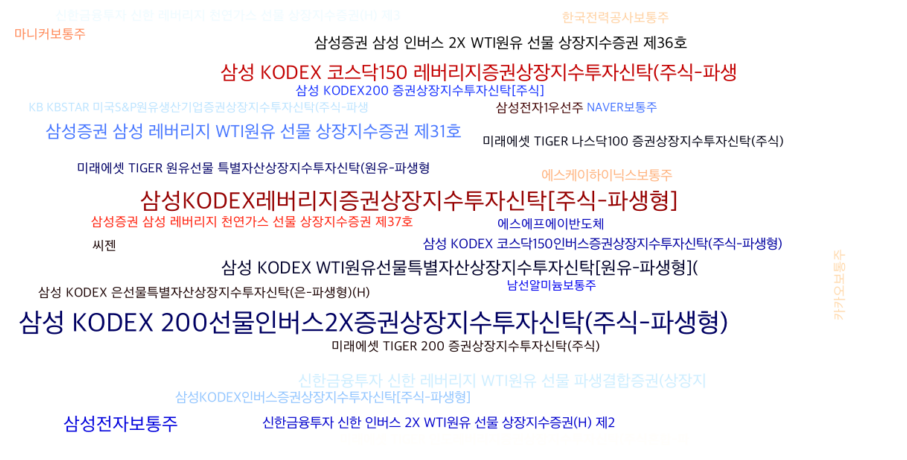

In [ ]:
yz_cate_temp = yz_cate_iem(0).reset_index().drop('sector',axis=1)
yz_cate_temp = yz_cate_temp.apply(tuple, axis=1)
yz_cate_temp = yz_cate_temp.to_list()

plt.rcParams['font.family'] = "AppleSDGothicNeo" 
font_path = '‪/System/Library/Fonts/AppleSDGothicNeo.ttc'

wc = WordCloud(max_font_size=80, relative_scaling=0.3,font_path=font_path, background_color="white",
                    colormap='flag', margin=10, width=1200, height=600)
cloud = wc.generate_from_frequencies(dict(yz_cate_temp)) 
plt.figure(figsize=(16,9)) 
plt.axis('off') 
plt.imshow(cloud, interpolation='bilinear')

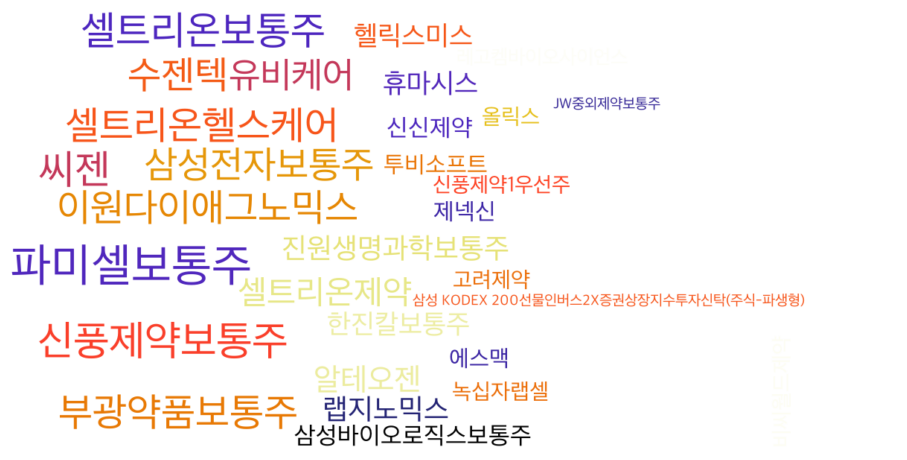

In [ ]:
yz_cate_temp = yz_cate_iem(1).reset_index().drop('sector',axis=1)
yz_cate_temp = yz_cate_temp.apply(tuple, axis=1)
yz_cate_temp = yz_cate_temp.to_list()

plt.rcParams['font.family'] = "AppleSDGothicNeo" 
font_path = '‪/System/Library/Fonts/AppleSDGothicNeo.ttc'

wc = WordCloud(max_font_size=80, relative_scaling=0.3,font_path=font_path, background_color="white",
                    colormap='CMRmap', margin=10, width=1200, height=600)
cloud = wc.generate_from_frequencies(dict(yz_cate_temp)) 
plt.figure(figsize=(16,9)) 
plt.axis('off') 
plt.imshow(cloud, interpolation='bilinear')

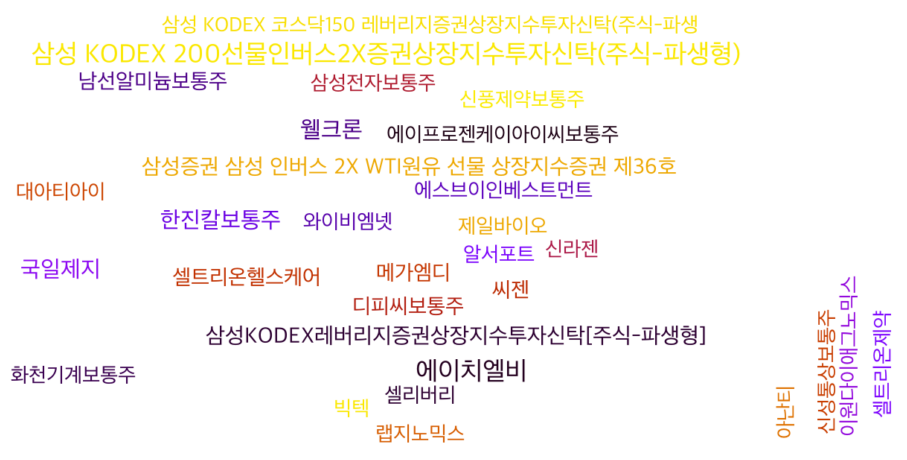

In [ ]:
yz_cate_temp = yz_cate_iem(2).reset_index().drop('sector',axis=1)
yz_cate_temp = yz_cate_temp.apply(tuple, axis=1)
yz_cate_temp = yz_cate_temp.to_list()

plt.rcParams['font.family'] = "AppleSDGothicNeo" 
font_path = '‪/System/Library/Fonts/AppleSDGothicNeo.ttc'

wc = WordCloud(max_font_size=80, relative_scaling=0.2,font_path=font_path, background_color="white",
                    colormap='gnuplot', margin=10, width=1200, height=600)
cloud = wc.generate_from_frequencies(dict(yz_cate_temp)) 
plt.figure(figsize=(16,9)) 
plt.axis('off') 
plt.imshow(cloud, interpolation='bilinear')

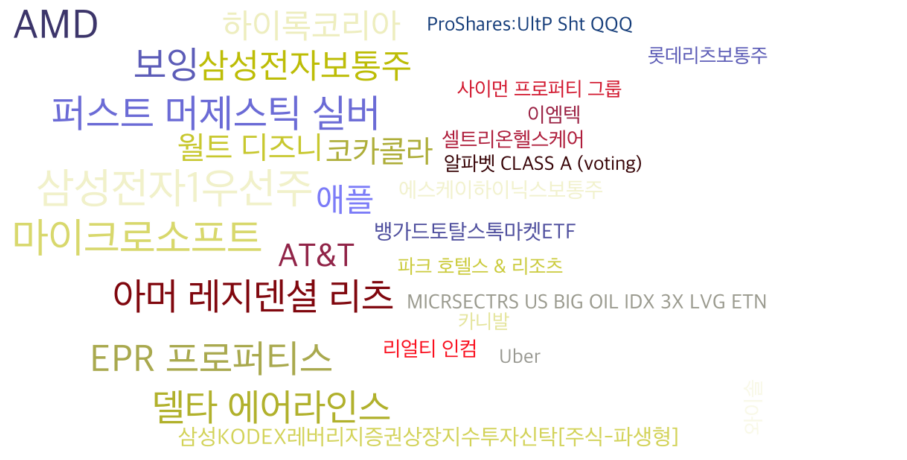

In [ ]:
yz_cate_temp = yz_cate_iem(3).reset_index().drop('sector',axis=1)
yz_cate_temp = yz_cate_temp.apply(tuple, axis=1)
yz_cate_temp = yz_cate_temp.to_list()

plt.rcParams['font.family'] = "AppleSDGothicNeo" 
font_path = '‪/System/Library/Fonts/AppleSDGothicNeo.ttc'

wc = WordCloud(max_font_size=80, relative_scaling=0.3,font_path=font_path, background_color="white",
                    colormap='gist_stern', margin=10, width=1200, height=600)
cloud = wc.generate_from_frequencies(dict(yz_cate_temp)) 
plt.figure(figsize=(16,9)) 
plt.axis('off') 
plt.imshow(cloud, interpolation='bilinear')

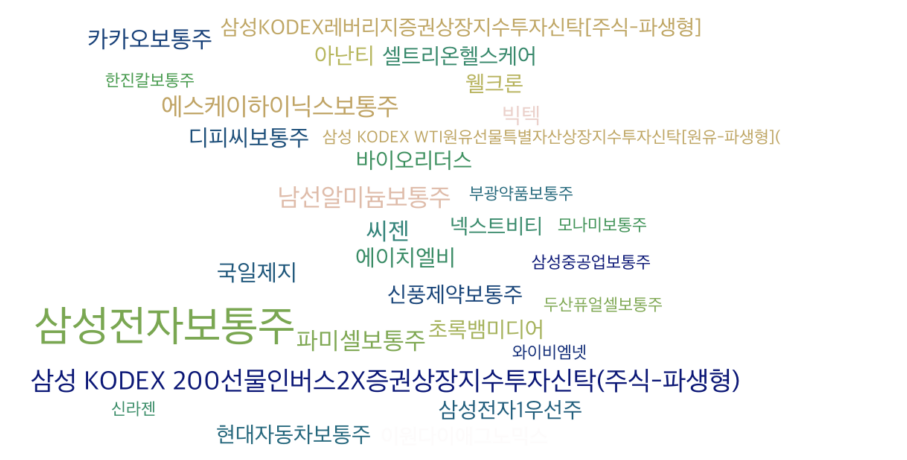

In [ ]:
yz_cate_temp = yz_cate_iem(4).reset_index().drop('sector',axis=1)
yz_cate_temp = yz_cate_temp.apply(tuple, axis=1)
yz_cate_temp = yz_cate_temp.to_list()

plt.rcParams['font.family'] = "AppleSDGothicNeo" 
font_path = '‪/System/Library/Fonts/AppleSDGothicNeo.ttc'

wc = WordCloud(max_font_size=80, relative_scaling=0.3,font_path=font_path, background_color="white",
                    colormap='gist_earth', margin=10, width=1200, height=600)
cloud = wc.generate_from_frequencies(dict(yz_cate_temp)) 
plt.figure(figsize=(16,9)) 
plt.axis('off') 
plt.imshow(cloud, interpolation='bilinear')

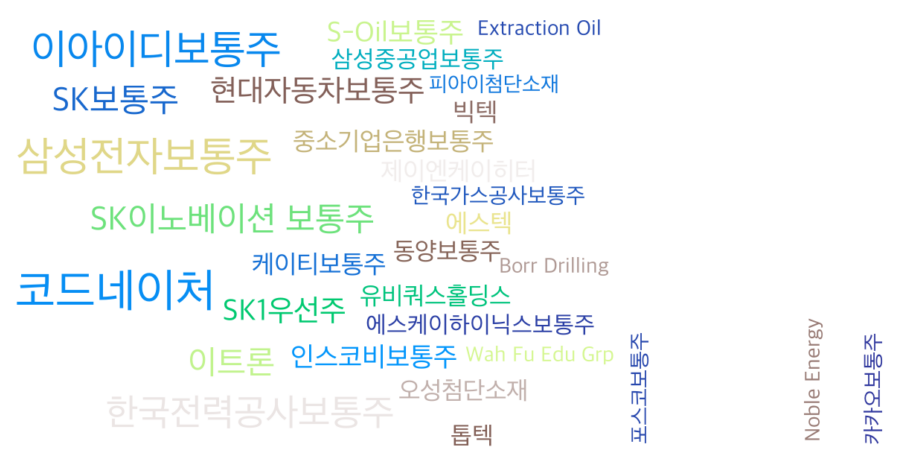

In [ ]:
yz_cate_temp = yz_cate_iem(5).reset_index().drop('sector',axis=1)
yz_cate_temp = yz_cate_temp.apply(tuple, axis=1)
yz_cate_temp = yz_cate_temp.to_list()

plt.rcParams['font.family'] = "AppleSDGothicNeo" 
font_path = '‪/System/Library/Fonts/AppleSDGothicNeo.ttc'

wc = WordCloud(max_font_size=80, relative_scaling=0.2,font_path=font_path, background_color="white",
                    colormap='terrain', margin=10, width=1200, height=600)
cloud = wc.generate_from_frequencies(dict(yz_cate_temp)) 
plt.figure(figsize=(16,9)) 
plt.axis('off') 
plt.imshow(cloud, interpolation='bilinear')

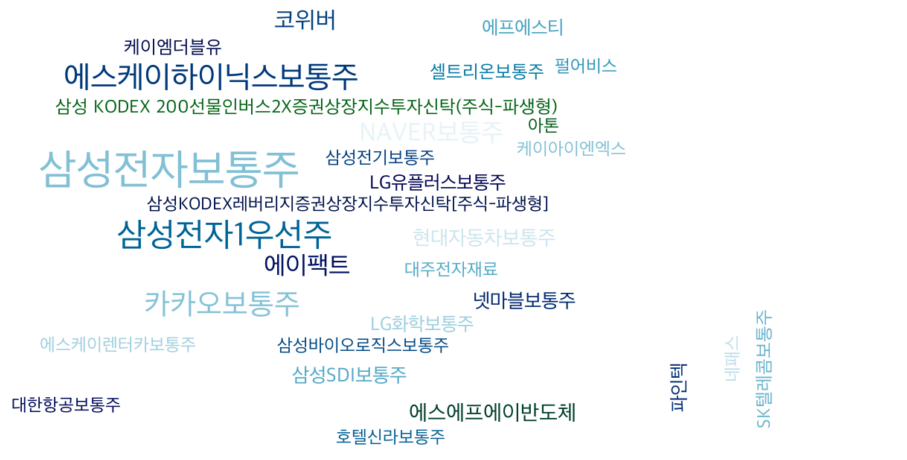

In [ ]:
yz_cate_temp = yz_cate_iem(7).reset_index().drop('sector',axis=1)
yz_cate_temp = yz_cate_temp.apply(tuple, axis=1)
yz_cate_temp = yz_cate_temp.to_list()

plt.rcParams['font.family'] = "AppleSDGothicNeo" 
font_path = '‪/System/Library/Fonts/AppleSDGothicNeo.ttc'

wc = WordCloud(max_font_size=80, relative_scaling=0.3,font_path=font_path, background_color="white",
                    colormap='ocean', margin=10, width=1200, height=600)
cloud = wc.generate_from_frequencies(dict(yz_cate_temp)) 
plt.figure(figsize=(16,9)) 
plt.axis('off') 
plt.imshow(cloud, interpolation='bilinear')

#### 결과
 앞서 카테고리 별로 업종 별 거래 비율을 확인한 결과대로, 상위 종목의 업종에서 총 거래 중 차지하는 비율이 높았던 업종을 확인할 수 있습니다.
  - 카테고리0은 ETF 업종인 삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형),삼성KODEX레버리지증권상장지수투자신탁[주식-파생형] 등 상위 20개 중 9개가 ETF 상품입니다.
  - 카테고리1은 삼성전자보통주(IT)와 한진칼보통주(산업재)를 제외하고는 모두 의료 업종입니다.
  - 카테고리2는 산업재(에이치앨비, 웰크론 등), 소재(국일재지, 남선알미늄보통주), 경기소비재(와이비엠넷)에 해당하는 종목이 상위에 위치합니다.
  - 카테고리3은 해외 IT 업종인 마이크로소프트와 애플을 확인할 수 있으며, 해외 통신서비스에 해당하는 종목인 AT&T와 디즈니도 볼 수 있습니다.
  - 카테고리4는 절대적인 거래수로 보면, IT, ETF, 소재, 의료, 경기소비재 등 다양한 업종의 종목을 거래하는 것을 알 수 있습니다.
  - 카테고리5는 에너지에 해당하는 코드네이처, 이아이디보통주, SK보통주가 상위며, 경기소비재(현대자동차보통주) 종목도 많이 거래합니다.
  - 카테고리 6은 산업재 종목(빅텍, 삼성중고업보통주, 나라엠엔디) 등이 상위로, 상위 20개 중 16개가 산업재 업종에 해당합니다.
  - 카테고리 7도 상위 20개 중 15개 종목이 IT 종목(삼성전자보통주, 카카오보통주, NAVER보통주 등)에 속합니다.
   

# 4. YZ세대 투자자 프로파일링

## 4.1 투자유형 테스트

#### 카테고리를 이용한 투자유형 테스트 제작
간단한 질문 몇가지로 투자유형을 8가지로 분류할 수 있습니다.
- 질문1: 해외 주식을 더 많이 거래한다
    - YES: 카테고리3
    - NO: 다음질문
- 질문2: 한번에 엄청난 금액을 거래한다
    - YES: 카테고리2 
    - NO: 다음질문
- 질문3: 다양한 종목을 거래한다
    - YES: 
        - 질문 3-1: 투자상품을 많이 거래한다
            - YES: 카테고리0
            - NO: 카테고리4
    - NO: 다음질문
- 질문4: 다음 중 제일 많이 투자하는 업종은? 의료/에너지&유틸리티/산업재/IT
    - 의료: 카테고리1
    - 에너지&유틸리티: 카테고리5
    - 산업재: 카테고리6
    - IT: 카테고리7

## 4.2 카테고리 명칭

#### 카테고리0
- 특징: ETN, ETF 업종을 많이 거래하며 주로 국내 주식 거래
- 명칭: 투자상품파

#### 카테고리1
- 특징: 의료 업종을 많이 거래하며 주로 국내 주식 거래
- 명칭: 의료파

#### 카테고리2
- 특징: 소재, 필수소비재, 경기소비재 업종을 많이 거래하며 종목수, 거래횟수, 총체결수량, 총체결금액이 매우 높음; 매수율보다 매도율이 높음
- 명칭: 큰손파

#### 카테고리3
- 특징: 금융, 부동산, 서비스, 원자재, 통신서비스 업종을 많이 거래하며 주로 시가총액이 높은 해외주식을 거래
- 명칭: 해외파 (원자재, 부동산 업종에 해당하는 종목은 해외주식만 있음)

#### 카테고리4
- 특징: ELW, 경기소비재, 필수소비재, 소재 업종을 많이 거래하며 주로 국내 주식 거래
- 명칭: 잡식파

#### 카테고리5
- 특징: 에너지와 유틸리티 업종을 많이 거래하며 종목수는 가장 적음
- 명칭: 에너지&유틸리티파

#### 카테고리6
- 특징: 산업재 업종을 많이 거래
- 명칭: 산업재파

#### 카테고리7
- 특징: IT 업종을 많이 거래하며 매수율이 제일 높음
- 명칭: IT파

## 4.3 결론

#### X세대와 비교했을 때 YZ세대 특징
X세대와 비교했을 때는 YZ세대는 해외주식에 조금 더 관심이 많으며, 매수율도 더 높습니다. 종목수, 총거래횟수, 총체결수량, 총체결금액은 YZ세대가 더 적게 나타났습니다. 업종별 비교에서는 YZ세대가 ETN, ETF와 부동산 업종에 더 관심이 많았습니다. 고객투자등급 비교에서는 YZ세대가 X세대보다 자산이 적으며 고객투자성향에서는 안정을 추구하는쪽이 더 많았습니다. 

#### YZ세대 안에서의 특징
YZ세대 안에서의 특징은 각 카테고리별로 분류할 수 있습니다.

처음 참여하는 대회인데 끝까지 봐주셔서 감사합니다 :)